# 1 Data Preparation for the Mongolian Gers Object Detection Model Building


- We used "prepare_data()" function to read the training sample, which was exported from ArcGIS pro as an appropriate size mini-batches.
- Although the "prepare_data()" function allows data transformation, such as randomly rotating, scaling, and flipping the images, we can alternatively use 'fast.ai' to transform image data manually. 

## 1.2 Verifying deep learning environment

In [10]:
%%time
from arcgis.gis import GIS
gis = GIS()
# gis = GIS("url", "username", "password")

import arcgis
from arcgis.learn import SingleShotDetector, prepare_data
import fastai
import torch
import torchvision

print("arcgis API version =", arcgis.__version__)
print("fastai version =", fastai.__version__)
print("torch version =", torch.__version__)
print("torchvision version =", torchvision.__version__)

arcgis API version = 1.8.5
fastai version = 1.0.60
torch version = 1.4.0
torchvision version = 0.5.0
CPU times: user 315 µs, sys: 0 ns, total: 315 µs
Wall time: 324 µs


## 1.3 4.	Checking if 'CUDA' device is picked up for training a model on GPU

In [11]:
torch.cuda.is_available()

True

In [12]:
torch.zeros((3, 224, 224)).cuda()

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')

In [13]:
data = prepare_data('training_chips/Training_Output', {1: '  ger'})

#### The "show_batch()" function allows visualization of the exported training samples with labels.

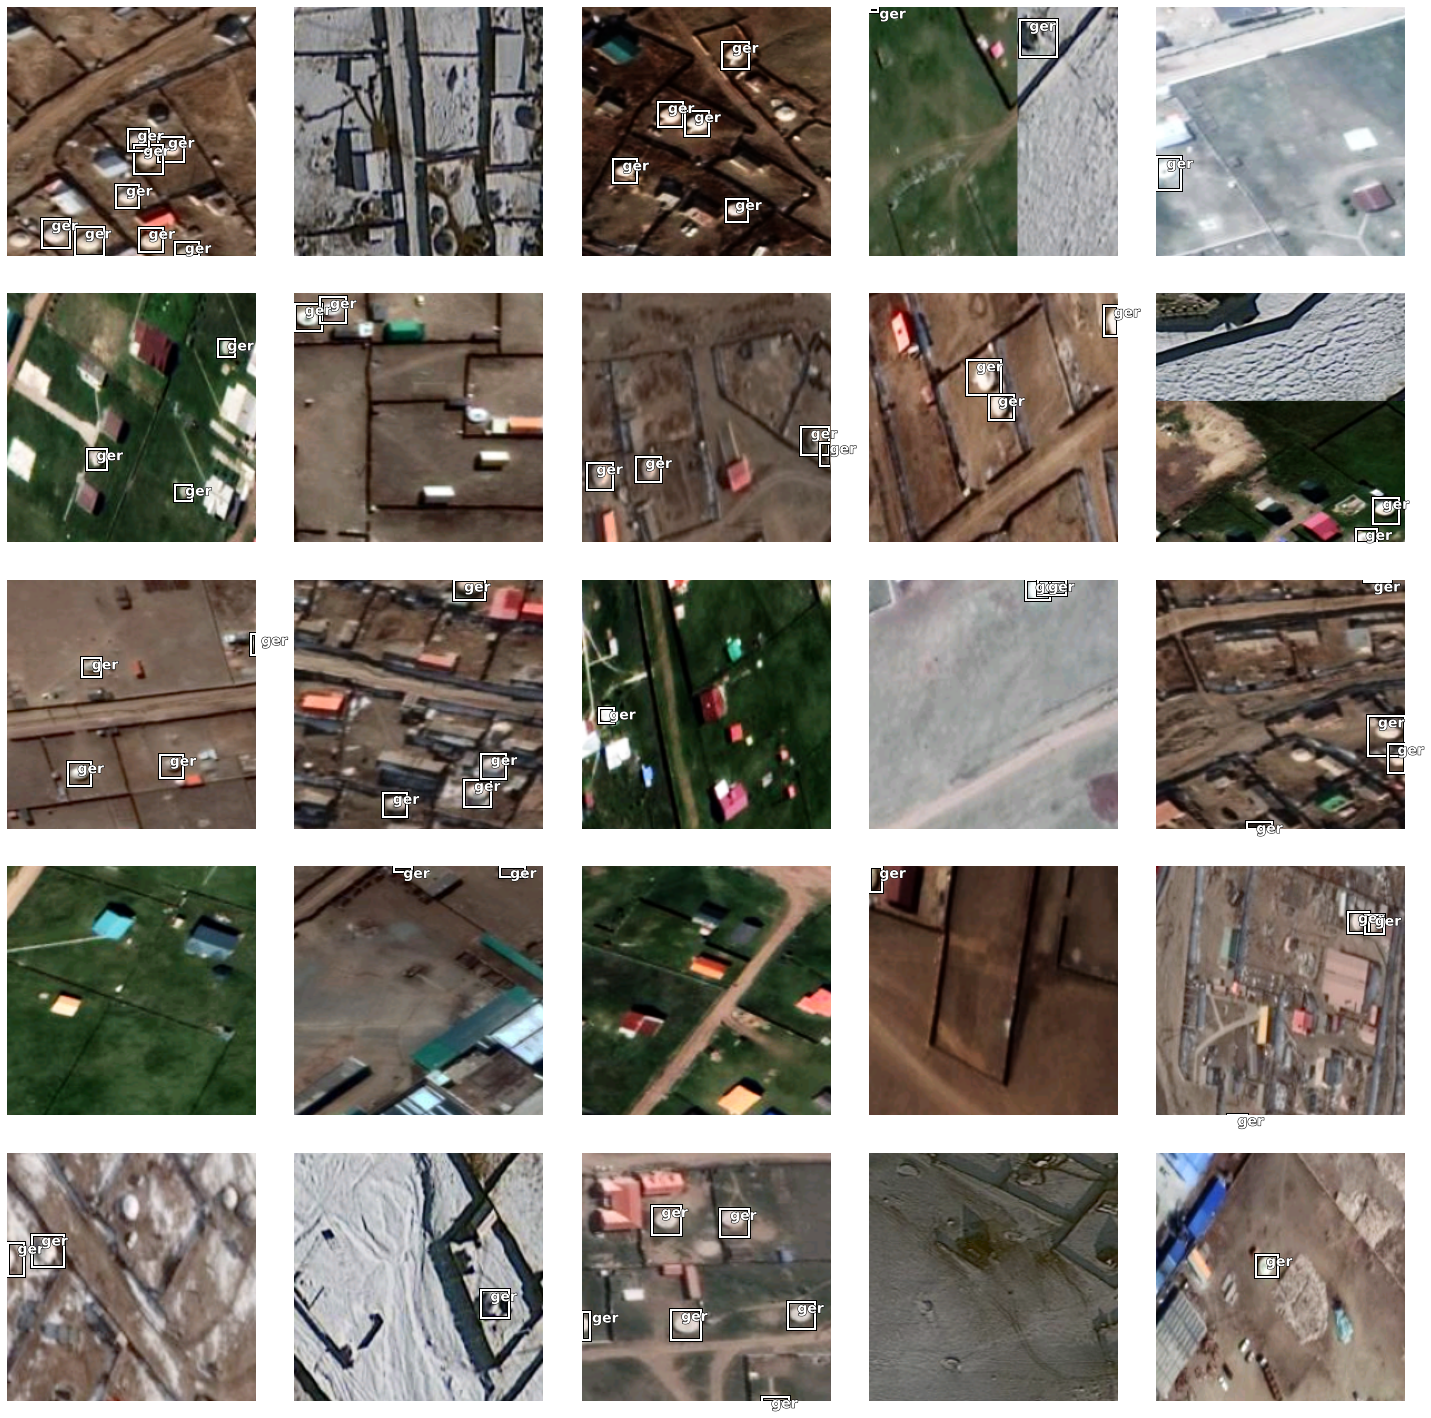

In [14]:
data.show_batch()

# 2 Model Training
#### We trained out the "Mongolian Ger Detection Model" based on Convolutional Neural Networks (CNN) in "arcgis.learn" package. We use a Single Shot Detector architecture

In [15]:
from arcgis.learn import SingleShotDetector

ssd = SingleShotDetector(data, grids=[9], zoomes=[1.0], ratio=[[1.0, 1.0]])

## 2.1 Find the efficient learning rate
The "arcgis.learn" model leverages fast.ai's learning rate finder and one-cycle learning and allows us to find appropriate hyperparameters for faster training. We use learning rate finder, "lr_find()", included in "arcgis.learn" to automatically choose an optimum learning rate.<br>
This process involves setting a good learning rate. The training process would be slow and computationally inefficient if the learning rate is too small. In contrast, if the learning rate is too big, it would be implausible to find a minimal loss of the model.


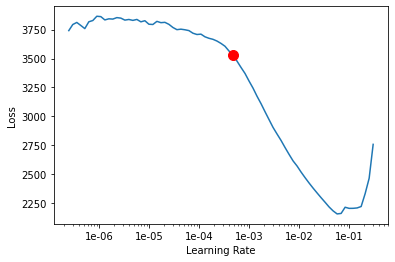

0.0004786300923226385

In [16]:
ssd.lr_find()

#### The above function returns 0.0004786300923226385 as the learning rate

## 2.2 Train the model
- Along with training the model, the CNN architecture would fine-tune earlier layers of the pre-trained model and train the newly added layers to fit the model better. 
- We have selected an appropriate learning rate to train the model (i.e. 0.000478). 
- We can use "fit()" function to train our model, which is an iterative process. The validation loss continues to go down within the defined epoch, 15 in this process. The model is trained iteratively until we observe the validation loss go up. This point indicates that the model starts to be overfitted to the training data.


In [17]:
#here we are training the model for 15 epochs with chosen learning rate
ssd.fit(15, lr=0.0004786300923226385)

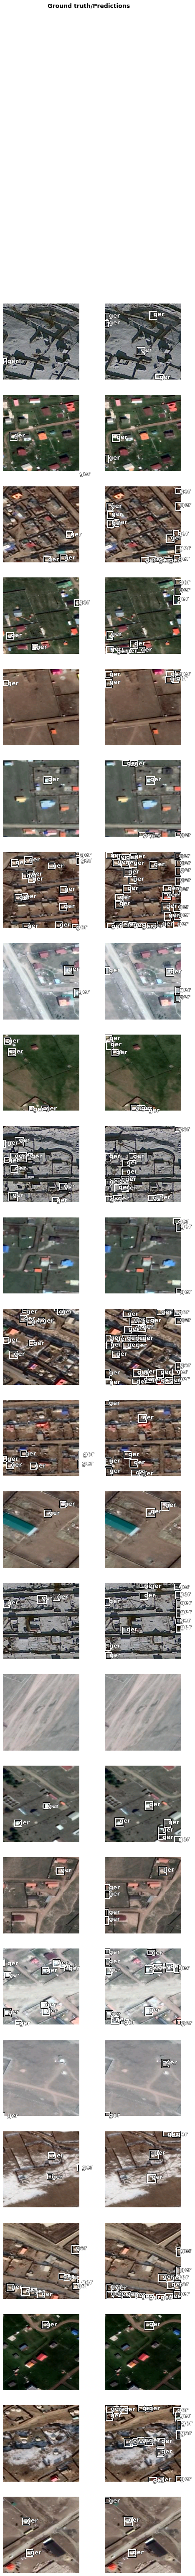

In [18]:
ssd.show_results(rows=25, thresh=0.05)

## 2.3 Save model 
#### We find an optimized model and save it in an 'emd' format. We can load the saved model from the directory and deploy it to detect and count the specific object that we have been targeting.

In [ ]:
ssd.save("mongolian_ger_detecting_model")